# Neural Network to Predict Heart Disease

## Trained on Heart Disease Cleveland UCI Dataset

Import libraries and download dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 10.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=0413a9bf497b78d4758bd0806bea4730cbe8208734aaafd124cd5e2c0d049e49
  Stored in directory: /Users/MachineLearning/Library/Caches/pip/wheels/e6/8e/67/e07554a720a493dc6b39b30488590ba92ed45448ad0134d253
Successfully built kaggle
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: noahvukosa
Your Kaggle Key: ········


100%|███████████████████████████████████████| 3.33k/3.33k [00:00<00:00, 837kB/s]

In [2]:
data = pd.read_csv('./heart-disease-cleveland-uci/heart_cleveland_upload.csv')

Each data instance is a patient, each patient has 13 attirbutes.

Attributes:

1. Age (years)
2. Sex (0 = female, 1 = male)
3. cp: chest pain type
* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestorol in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
* Value 0: upsloping
* Value 1: flat
* Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

Label: condition: 0 = no disease, 1 = disease


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


No instances have null attributes

In [4]:
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


No duplicates

In [5]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
292    False
293    False
294    False
295    False
296    False
Length: 297, dtype: bool

In [6]:
copy = data.copy()

In [7]:
copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


297 instances. Randomize before splitting training and validation data

In [8]:
copy.info()
randomizedcopy = copy.sample(frac=1)
randomizedcopy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
249,54,1,3,140,239,0,0,160,0,1.2,0,0,0,0
177,64,1,3,128,263,0,0,105,1,0.2,1,1,2,0
269,48,1,3,130,256,1,2,150,1,0.0,0,2,2,1
193,61,0,3,145,307,0,2,146,1,1.0,1,0,2,1
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1


In [9]:
dataset = randomizedcopy.values
data.shape

(297, 14)

Seperate the data from labels, convert all data to float

In [10]:
X = dataset[:,0:12].astype(float) # number of cols-1
Y = dataset[:,13].astype(float)

Seperate training and test data/labels

In [11]:
train_data = X[0:205,:]
train_labels = Y[0:205]
test_data = X[206:,:]
test_labels = Y[206:]


Each instance has 13 attributes, and a label indicating prescense of heart disease

In [12]:
print(train_data)
print(train_labels)

[[54.   1.   3.  ...  1.2  0.   0. ]
 [64.   1.   3.  ...  0.2  1.   1. ]
 [48.   1.   3.  ...  0.   0.   2. ]
 ...
 [64.   0.   3.  ...  2.   1.   2. ]
 [56.   1.   1.  ...  0.   2.   0. ]
 [49.   1.   2.  ...  2.   1.   3. ]]
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]


Standardize training and validation data since attributes have different ranges (note: use mean and standard deviation of training data to normalize validation data)

In [13]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [14]:
print(train_data)

[[-0.10467877  0.70452137  0.87486631 ...  0.18400895 -0.98049279
  -0.74366007]
 [ 1.05527519  0.70452137  0.87486631 ... -0.67330549  0.61475342
   0.30052017]
 [-0.80065115  0.70452137  0.87486631 ... -0.84476838 -0.98049279
   1.3447004 ]
 ...
 [ 1.05527519 -1.41940335  0.87486631 ...  0.86986051  0.61475342
   1.3447004 ]
 [ 0.12731202  0.70452137 -1.22276636 ... -0.84476838  2.20999962
  -0.74366007]
 [-0.68465575  0.70452137 -0.17395003 ...  0.86986051  0.61475342
   2.38888064]]


Build model. Using a sequential model consisting of an input layer, 2 hidden layers, and output layer. input and hidden layers have relu activation functions while output has a sigmoid activation. Size of layers are 32 aside from output layer of size 1

In [35]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
    return model

Not a lot of data available. So use K-fold cross validation. k =4. Set up arrays to track history of validation and training loss/accuracy. Train each model with 50 epochs

In [36]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []
all_val_loss_histories = []
all_train_loss_histories = []
all_val_acc_histories = []
all_train_acc_histories = []

In [37]:
for i in range(k):
    #prepare validation data
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    #prepare training data
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
    [train_labels[:i * num_val_samples],
    train_labels[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=5)
    train_history = history.history['loss']
    val_history = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    all_train_loss_histories.append(train_history)
    all_val_loss_histories.append(val_history)
    all_train_acc_histories.append(train_acc)
    all_val_acc_histories.append(val_acc)

processing fold # 0
Epoch 1/50
31/31 [==============================] - 2s 43ms/step - loss: 0.6984 - accuracy: 0.5130 - val_loss: 0.6451 - val_accuracy: 0.6667
Epoch 2/50
31/31 [==============================] - 0s 15ms/step - loss: 0.6178 - accuracy: 0.6883 - val_loss: 0.5963 - val_accuracy: 0.7647
Epoch 3/50
31/31 [==============================] - 0s 15ms/step - loss: 0.5520 - accuracy: 0.7532 - val_loss: 0.5540 - val_accuracy: 0.7451
Epoch 4/50
31/31 [==============================] - 0s 14ms/step - loss: 0.4912 - accuracy: 0.7662 - val_loss: 0.5259 - val_accuracy: 0.7255
Epoch 5/50
31/31 [==============================] - 0s 13ms/step - loss: 0.4411 - accuracy: 0.8117 - val_loss: 0.5128 - val_accuracy: 0.7647
Epoch 6/50
31/31 [==============================] - 0s 13ms/step - loss: 0.4031 - accuracy: 0.8182 - val_loss: 0.5106 - val_accuracy: 0.7647
Epoch 7/50
31/31 [==============================] - 0s 13ms/step - loss: 0.3732 - accuracy: 0.8312 - val_loss: 0.5167 - val_accuracy: 

Training loss approaching 0.1 while validation loss begins to increase after 10 epochs, suggesting overfitting

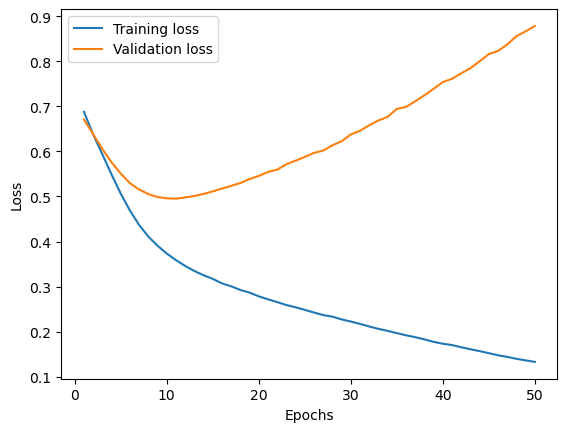

In [39]:
average_train_loss = [np.mean([x[i] for x in all_train_loss_histories]) for i in range(num_epochs)]
average_val_loss = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_train_acc = [np.mean([x[i] for x in all_train_acc_histories]) for i in range(num_epochs)]
average_val_acc = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_val_loss) + 1), average_train_loss, label='Training loss')
plt.plot(range(1, len(average_val_loss) + 1), average_val_loss, label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Training accuracy approaching 96%, while accuracy plateaues at 76% after 10 epochs

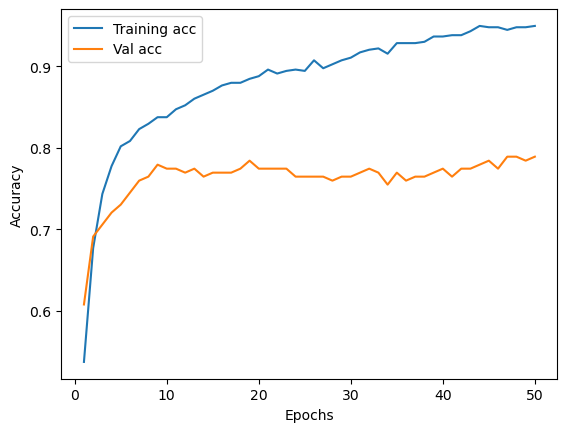

In [41]:
plt.clf()
plt.plot(range(1, len(average_val_loss) + 1), average_train_acc, label='Training acc')
plt.plot(range(1, len(average_val_loss) + 1), average_val_acc, label='Val acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

## Trial 2

Looks like model overfitted. We can reduce overfitting by using smaller layers and by using dropout. Dropout sets the output of a fraction of nodes to zero (the nodes are chosen at random). This noise helps prevent coincidental patterns from being memorized by the model.

In [42]:
def build_model2():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
    return model

In [43]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []
all_val_loss_histories = []
all_train_loss_histories = []
all_val_acc_histories = []
all_train_acc_histories = []

In [44]:
for i in range(k):
    #prepare validation data
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    #prepare training data
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
    [train_labels[:i * num_val_samples],
    train_labels[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model2()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=5)
    train_history = history.history['loss']
    val_history = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    all_train_loss_histories.append(train_history)
    all_val_loss_histories.append(val_history)
    all_train_acc_histories.append(train_acc)
    all_val_acc_histories.append(val_acc)

processing fold # 0
Epoch 1/50
31/31 [==============================] - 2s 48ms/step - loss: 0.8488 - accuracy: 0.4935 - val_loss: 0.6932 - val_accuracy: 0.5294
Epoch 2/50
31/31 [==============================] - 0s 16ms/step - loss: 0.9179 - accuracy: 0.4870 - val_loss: 0.6850 - val_accuracy: 0.5294
Epoch 3/50
31/31 [==============================] - 0s 16ms/step - loss: 0.6933 - accuracy: 0.6364 - val_loss: 0.6750 - val_accuracy: 0.5294
Epoch 4/50
31/31 [==============================] - 0s 15ms/step - loss: 0.8694 - accuracy: 0.5455 - val_loss: 0.6664 - val_accuracy: 0.5490
Epoch 5/50
31/31 [==============================] - 0s 14ms/step - loss: 0.7632 - accuracy: 0.5584 - val_loss: 0.6628 - val_accuracy: 0.5686
Epoch 6/50
31/31 [==============================] - 0s 15ms/step - loss: 0.7534 - accuracy: 0.5909 - val_loss: 0.6583 - val_accuracy: 0.5294
Epoch 7/50
31/31 [==============================] - 0s 15ms/step - loss: 0.6815 - accuracy: 0.5909 - val_loss: 0.6562 - val_accuracy: 

While validation loss is greater than training loss, it is descreasing as epochs increase

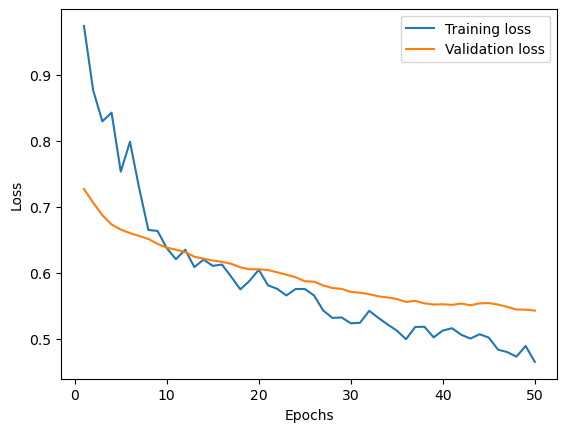

In [45]:
average_train_loss = [np.mean([x[i] for x in all_train_loss_histories]) for i in range(num_epochs)]
average_val_loss = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_train_acc = [np.mean([x[i] for x in all_train_acc_histories]) for i in range(num_epochs)]
average_val_acc = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_val_loss) + 1), average_train_loss, label='Training loss')
plt.plot(range(1, len(average_val_loss) + 1), average_val_loss, label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Dropout seemed to create noise in accuracy data, while training accuracy is smaller than trial 1 model, validation accuracy is around the same as training accuracy. Suggesting we improved generalization of model

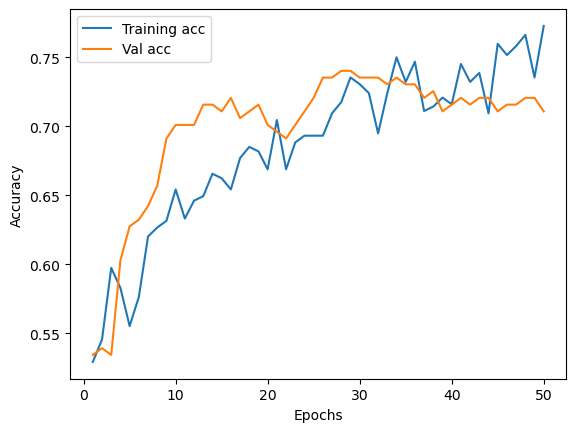

In [47]:
plt.clf()
plt.plot(range(1, len(average_val_loss) + 1), average_train_acc, label='Training acc')
plt.plot(range(1, len(average_val_loss) + 1), average_val_acc, label='Val acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

## Trial 3 

Increase epochs to 75. Remove one of the hidden layers

In [48]:
def build_model3():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
    return model

In [49]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 75
all_scores = []
all_val_loss_histories = []
all_train_loss_histories = []
all_val_acc_histories = []
all_train_acc_histories = []

In [50]:
for i in range(k):
    #prepare validation data
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    #prepare training data
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
    [train_labels[:i * num_val_samples],
    train_labels[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model3()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=5)
    train_history = history.history['loss']
    val_history = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    all_train_loss_histories.append(train_history)
    all_val_loss_histories.append(val_history)
    all_train_acc_histories.append(train_acc)
    all_val_acc_histories.append(val_acc)

processing fold # 0
Epoch 1/75
31/31 [==============================] - 2s 39ms/step - loss: 0.8902 - accuracy: 0.4675 - val_loss: 0.7509 - val_accuracy: 0.3529
Epoch 2/75
31/31 [==============================] - 0s 14ms/step - loss: 0.8264 - accuracy: 0.5649 - val_loss: 0.7369 - val_accuracy: 0.3333
Epoch 3/75
31/31 [==============================] - 0s 15ms/step - loss: 0.8495 - accuracy: 0.5065 - val_loss: 0.7226 - val_accuracy: 0.3333
Epoch 4/75
31/31 [==============================] - 0s 13ms/step - loss: 0.7754 - accuracy: 0.4935 - val_loss: 0.7145 - val_accuracy: 0.3725
Epoch 5/75
31/31 [==============================] - 0s 13ms/step - loss: 0.7391 - accuracy: 0.5000 - val_loss: 0.7044 - val_accuracy: 0.4510
Epoch 6/75
31/31 [==============================] - 0s 14ms/step - loss: 0.7286 - accuracy: 0.5325 - val_loss: 0.6963 - val_accuracy: 0.4510
Epoch 7/75
31/31 [==============================] - 0s 13ms/step - loss: 0.6834 - accuracy: 0.5909 - val_loss: 0.6954 - val_accuracy: 

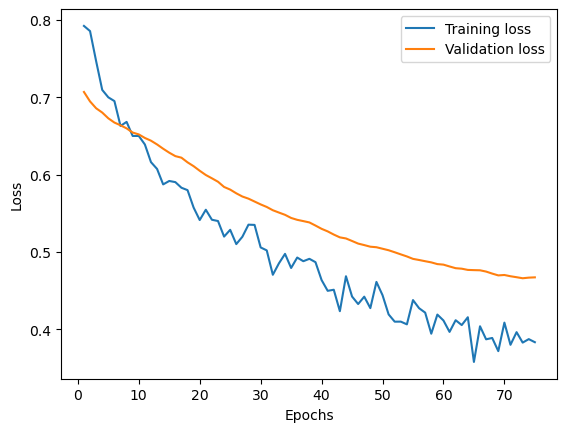

In [51]:
average_train_loss = [np.mean([x[i] for x in all_train_loss_histories]) for i in range(num_epochs)]
average_val_loss = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_train_acc = [np.mean([x[i] for x in all_train_acc_histories]) for i in range(num_epochs)]
average_val_acc = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_val_loss) + 1), average_train_loss, label='Training loss')
plt.plot(range(1, len(average_val_loss) + 1), average_val_loss, label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training and validation accuracy very similar throughout. By 50 epochs, accuracy is around 80%, suggesting removal of layer improved model accuracy. Seems like model has not plateaued so could possibly add more epochs.

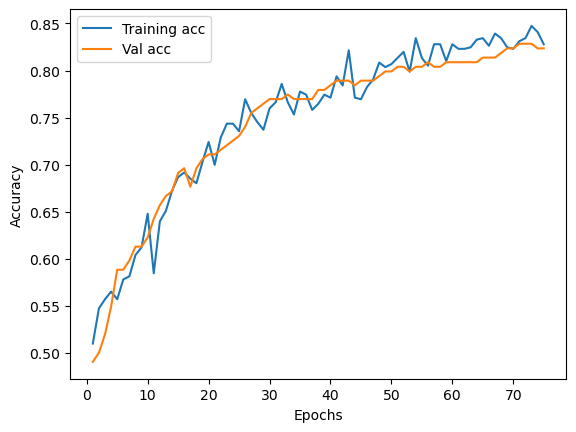

In [52]:
plt.clf()
plt.plot(range(1, len(average_val_loss) + 1), average_train_acc, label='Training acc')
plt.plot(range(1, len(average_val_loss) + 1), average_val_acc, label='Val acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

Increase epochs to 100, add L2 regularization. Regularization will add a penalty to the cost function for any large weight coefficient values, encouraging small distribution of weight coefficients

In [69]:
from keras import regularizers
def build_model4():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.L2(0.001),
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
    return model

In [70]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_val_loss_histories = []
all_train_loss_histories = []
all_val_acc_histories = []
all_train_acc_histories = []

In [71]:
for i in range(k):
    #prepare validation data
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    #prepare training data
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
    [train_labels[:i * num_val_samples],
    train_labels[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model4()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=5)
    train_history = history.history['loss']
    val_history = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    all_train_loss_histories.append(train_history)
    all_val_loss_histories.append(val_history)
    all_train_acc_histories.append(train_acc)
    all_val_acc_histories.append(val_acc)

processing fold # 0
Epoch 1/100
31/31 [==============================] - 3s 57ms/step - loss: 0.9311 - accuracy: 0.4481 - val_loss: 0.8899 - val_accuracy: 0.3725
Epoch 2/100
31/31 [==============================] - 1s 29ms/step - loss: 0.9270 - accuracy: 0.3961 - val_loss: 0.8576 - val_accuracy: 0.3529
Epoch 3/100
31/31 [==============================] - 1s 27ms/step - loss: 0.7999 - accuracy: 0.4740 - val_loss: 0.8369 - val_accuracy: 0.3333
Epoch 4/100
31/31 [==============================] - 1s 25ms/step - loss: 0.8721 - accuracy: 0.5065 - val_loss: 0.8142 - val_accuracy: 0.3333
Epoch 5/100
31/31 [==============================] - 1s 27ms/step - loss: 0.8571 - accuracy: 0.4935 - val_loss: 0.7951 - val_accuracy: 0.3529
Epoch 6/100
31/31 [==============================] - 1s 30ms/step - loss: 0.8362 - accuracy: 0.5065 - val_loss: 0.7779 - val_accuracy: 0.4314
Epoch 7/100
31/31 [==============================] - 1s 27ms/step - loss: 0.7783 - accuracy: 0.5714 - val_loss: 0.7632 - val_acc

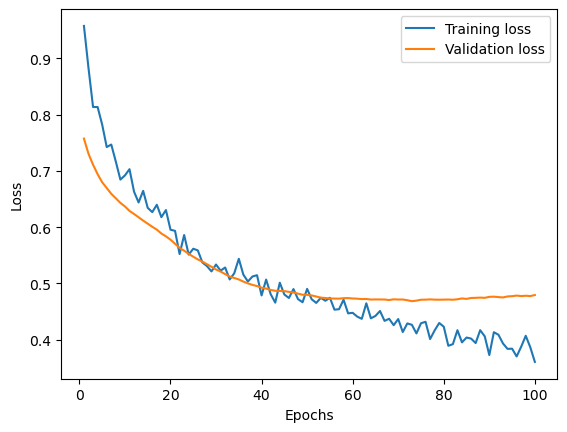

In [72]:
average_train_loss = [np.mean([x[i] for x in all_train_loss_histories]) for i in range(num_epochs)]
average_val_loss = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_train_acc = [np.mean([x[i] for x in all_train_acc_histories]) for i in range(num_epochs)]
average_val_acc = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_val_loss) + 1), average_train_loss, label='Training loss')
plt.plot(range(1, len(average_val_loss) + 1), average_val_loss, label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

validation loss/accuracy seems to worsen after 75 epochs, so return to 75 epochs. Little improvement from trial 3.

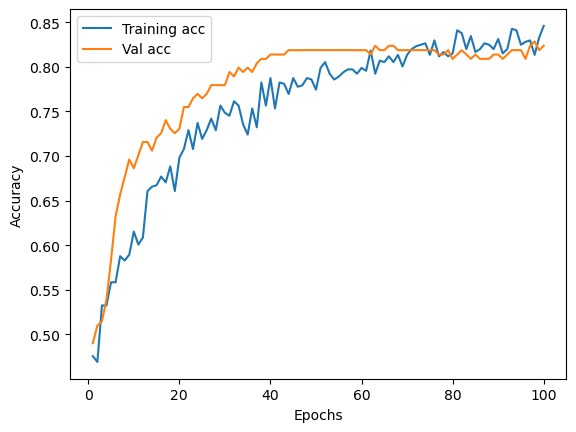

In [73]:
plt.clf()
plt.plot(range(1, len(average_val_loss) + 1), average_train_acc, label='Training acc')
plt.plot(range(1, len(average_val_loss) + 1), average_val_acc, label='Val acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

## Trial 5
75 epochs model 4

In [102]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 75
all_scores = []
all_val_loss_histories = []
all_train_loss_histories = []
all_val_acc_histories = []
all_train_acc_histories = []

In [103]:
for i in range(k):
    #prepare validation data
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    #prepare training data
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
    [train_labels[:i * num_val_samples],
    train_labels[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model4()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=5)
    train_history = history.history['loss']
    val_history = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    all_train_loss_histories.append(train_history)
    all_val_loss_histories.append(val_history)
    all_train_acc_histories.append(train_acc)
    all_val_acc_histories.append(val_acc)

processing fold # 0
Epoch 1/75
31/31 [==============================] - 3s 75ms/step - loss: 0.8479 - accuracy: 0.3896 - val_loss: 0.7293 - val_accuracy: 0.3725
Epoch 2/75
31/31 [==============================] - 1s 33ms/step - loss: 0.7704 - accuracy: 0.4545 - val_loss: 0.7170 - val_accuracy: 0.4118
Epoch 3/75
31/31 [==============================] - 1s 31ms/step - loss: 0.7271 - accuracy: 0.4740 - val_loss: 0.7077 - val_accuracy: 0.4510
Epoch 4/75
31/31 [==============================] - 1s 33ms/step - loss: 0.6995 - accuracy: 0.5584 - val_loss: 0.6957 - val_accuracy: 0.5686
Epoch 5/75
31/31 [==============================] - 1s 32ms/step - loss: 0.7156 - accuracy: 0.4805 - val_loss: 0.6857 - val_accuracy: 0.5490
Epoch 6/75
31/31 [==============================] - 1s 32ms/step - loss: 0.6940 - accuracy: 0.6299 - val_loss: 0.6777 - val_accuracy: 0.5490
Epoch 7/75
31/31 [==============================] - 1s 31ms/step - loss: 0.6888 - accuracy: 0.5455 - val_loss: 0.6711 - val_accuracy: 

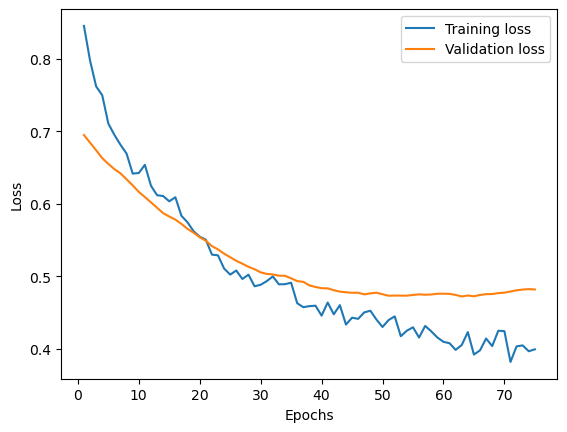

In [104]:
average_train_loss = [np.mean([x[i] for x in all_train_loss_histories]) for i in range(num_epochs)]
average_val_loss = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_train_acc = [np.mean([x[i] for x in all_train_acc_histories]) for i in range(num_epochs)]
average_val_acc = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_val_loss) + 1), average_train_loss, label='Training loss')
plt.plot(range(1, len(average_val_loss) + 1), average_val_loss, label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

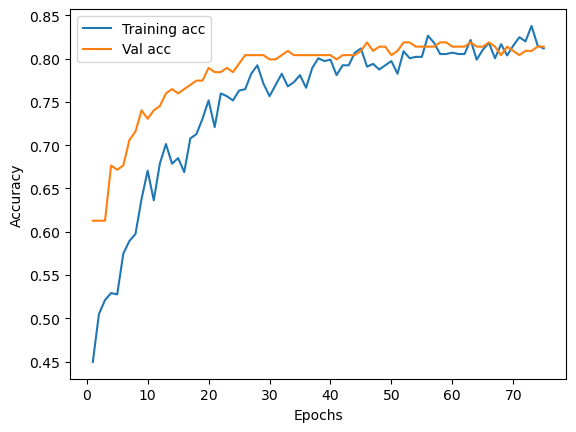

In [105]:
plt.clf()
plt.plot(range(1, len(average_val_loss) + 1), average_train_acc, label='Training acc')
plt.plot(range(1, len(average_val_loss) + 1), average_val_acc, label='Val acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()